<a href="https://colab.research.google.com/github/g-roger/analise-vegetativa-bemagro/blob/main/20ia_05_EDA_bemagro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# requirements

!pip install rasterio
!pip install ipygee
!pip install geemap

     |████████████████████████████████| 1.9 MB 8.5 MB/s 
     |████████████████████████████████| 95 kB 3.5 MB/s 
     |████████████████████████████████| 8.7 MB 44.8 MB/s 
     |████████████████████████████████| 76 kB 5.0 MB/s 
     |████████████████████████████████| 1.3 MB 44.2 MB/s 
     |████████████████████████████████| 99 kB 9.0 MB/s 
     |████████████████████████████████| 5.4 MB 40.1 MB/s 
     |████████████████████████████████| 130 kB 44.5 MB/s 
     |████████████████████████████████| 1.7 MB 48.0 MB/s 
     |████████████████████████████████| 187 kB 43.6 MB/s 
     |████████████████████████████████| 216 kB 45.7 MB/s 
     |████████████████████████████████| 1.2 MB 49.8 MB/s 
     |████████████████████████████████| 98 kB 8.0 MB/s 
     |████████████████████████████████| 97 kB 6.6 MB/s 
     |████████████████████████████████| 341 kB 71.5 MB/s 
     |████████████████████████████████| 428 kB 50.3 MB/s 
     |████████████████████████████████| 50 kB 6.2 MB/s 
     |█████████████████████

In [ ]:
# imports
import ee
import geemap

import pandas as pd
import rasterio
from rasterio.plot import show, show_hist
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import rasterio.features
import rasterio.warp
from ipygee import*
rasterio.__version__

'1.2.10'

In [ ]:
# paths

path = 'https://raw.githubusercontent.com/g-roger/analise-vegetativa-bemagro/main/datasets'
dataset_1 = path + '/dataset_1/'
dataset_2 = path + '/dataset_2/'
df_1 = pd.read_csv(dataset_1 + 'DATASET1.csv')
df_2 = pd.read_csv(dataset_2 + 'DATASET2.csv')

In [ ]:
# Lista com todos os arquivos raster do dataset

def get_rasters(df, dataset):
  raster_list = []
  for file in df['NDVI']:
    try:
      raster_list.append(dataset + file)
    except:
      print('ops, não achei', file)
      continue
  return raster_list

rasters_df1 = get_rasters(df_1, dataset_1)
rasters_df2 = get_rasters(df_2, dataset_2)

In [ ]:
df_1

,temp ano,temp mes,Data,Nublado,Cultura,RGB,NDVI
0,2016,3,2016-03-30,"0,00%",algodao,RGB/2016-03-30.tif,NDVI/2016-03-30.tif
1,2016,4,2016-04-29,"0,00%",algodao,RGB/2016-04-29.tif,NDVI/2016-04-29.tif
2,2016,7,2016-07-18,"0,00%",algodao,RGB/2016-07-18.tif,NDVI/2016-07-18.tif
3,2016,8,2016-08-07,"0,00%",colheita,RGB/2016-08-07.tif,NDVI/2016-08-07.tif
4,2016,9,2016-09-16,"0,89%",soja,RGB/2016-09-16.tif,NDVI/2016-09-16.tif
...,...,...,...,...,...,...,...
61,2021,8,2021-08-16,"0,00%",colheita,RGB/2021-08-16.tif,NDVI/2021-08-16.tif
62,2021,9,2021-09-15,"0,00%",soja,RGB/2021-09-15.tif,NDVI/2021-09-15.tif
63,2021,10,2021-10-15,"0,00%",soja,RGB/2021-10-15.tif,NDVI/2021-10-15.tif
64,2021,11,2021-11-14,"0,03%",soja,RGB/2021-11-14.tif,NDVI/2021-11-14.tif


In [ ]:
df_2

,temp ano,temp mes,Data,Nublado,Cultura,RGB,NDVI
0,2016,3,2016-03-30,"0,00%",algodao,RGB/2016-03-30.tif,NDVI/2016-03-30.tif
1,2016,4,2016-04-29,"0,00%",algodao,RGB/2016-04-29.tif,NDVI/2016-04-29.tif
2,2016,5,2016-05-19,"0,00%",algodao,RGB/2016-05-19.tif,NDVI/2016-05-19.tif
3,2016,6,2016-06-28,"0,00%",algodao,RGB/2016-06-28.tif,NDVI/2016-06-28.tif
4,2016,7,2016-07-18,"0,00%",colheita,RGB/2016-07-18.tif,NDVI/2016-07-18.tif
...,...,...,...,...,...,...,...
62,2021,8,2021-08-11,"0,00%",algodao,RGB/2021-08-11.tif,NDVI/2021-08-11.tif
63,2021,9,2021-09-15,"0,00%",colheita,RGB/2021-09-15.tif,NDVI/2021-09-15.tif
64,2021,10,2021-10-15,"0,00%",soja,RGB/2021-10-15.tif,NDVI/2021-10-15.tif
65,2021,11,2021-11-29,"0,00%",soja,RGB/2021-11-29.tif,NDVI/2021-11-29.tif


In [ ]:
img1 = rasterio.open(dataset_1 + df_1['NDVI'][0])
img2 = rasterio.open(dataset_1 + df_1['NDVI'][1])
img3 = rasterio.open(dataset_1 + df_1['NDVI'][2])
img4 = rasterio.open(dataset_1 + df_1['NDVI'][3])
img5 = rasterio.open(dataset_1 + df_1['NDVI'][4])


In [ ]:
print(img1.width)
print(img1.height)
print(img1.dtypes[0])
print(img1.crs)
print(img1.transform)
print(img1.read(1))

205
132
float32
EPSG:3857
| 9.55, 0.00,-6135485.60|
| 0.00,-9.55,-1747770.87|
| 0.00, 0.00, 1.00|
[[-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 ...
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]]


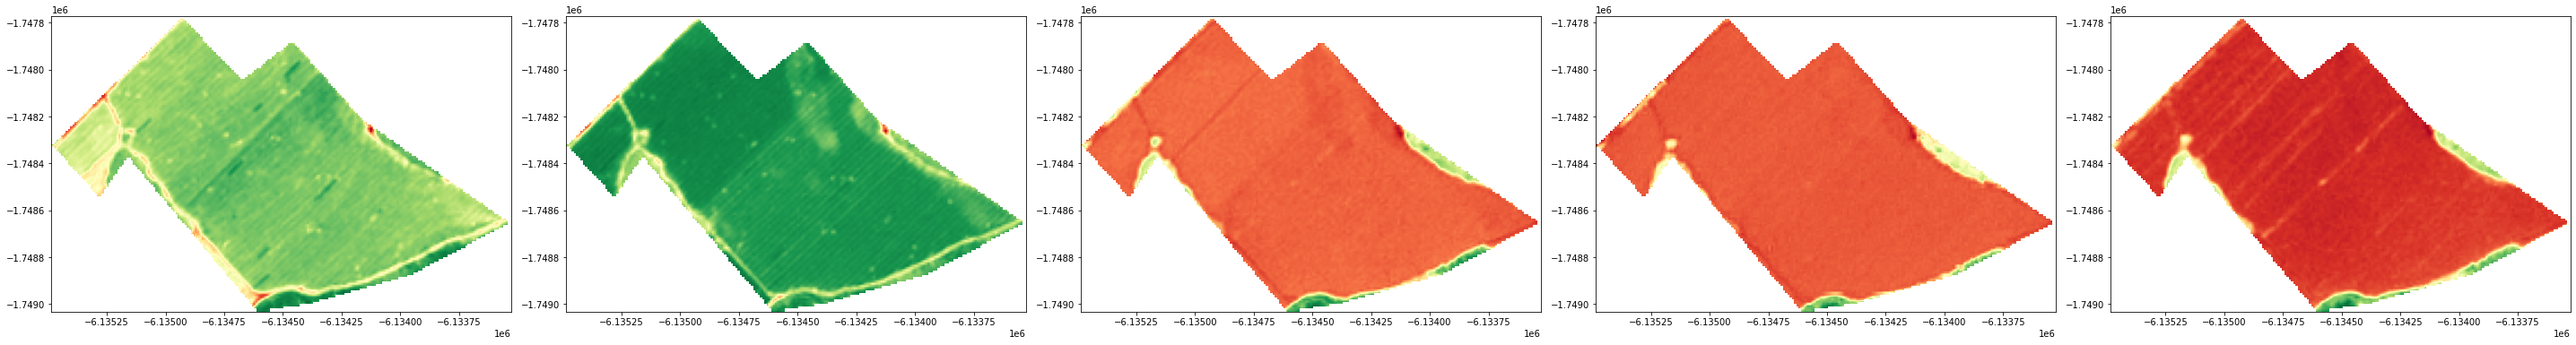

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(40,7))
show(img1, ax=ax1, cmap='RdYlGn')
show(img2, ax=ax2, cmap='RdYlGn')
show(img3, ax=ax3, cmap='RdYlGn')
show(img4, ax=ax4, cmap='RdYlGn')
show(img5, ax=ax5, cmap='RdYlGn')


fig.tight_layout()


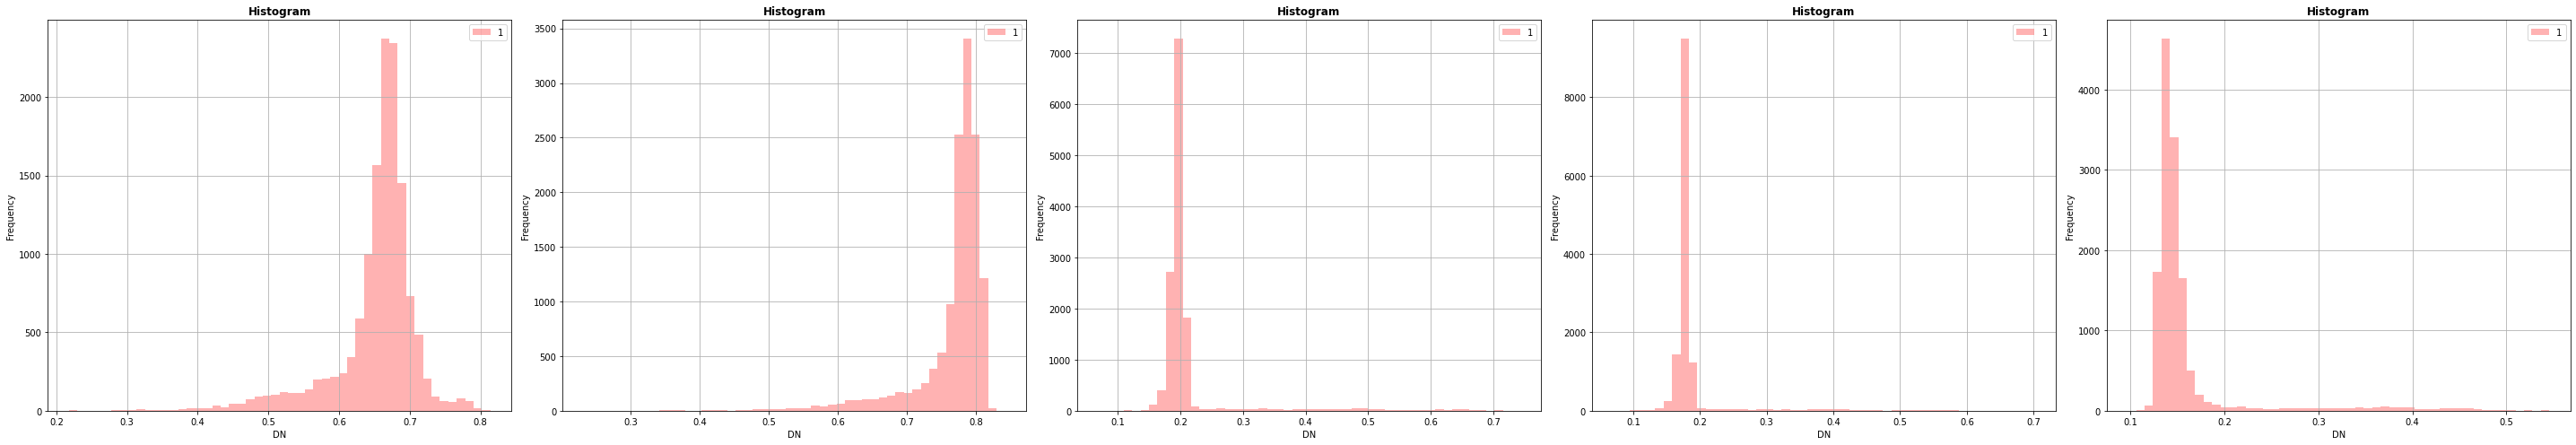

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(40,7))
show_hist(img1, ax=ax1, bins=50, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram",)
show_hist(img2, ax=ax2, bins=50, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")
show_hist(img3, ax=ax3, bins=50, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")
show_hist(img4, ax=ax4, bins=50, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")
show_hist(img5, ax=ax5, bins=50, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")


fig.tight_layout()

In [ ]:
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=fhGMR8IwL4uHl6_ARguIgQwDvi7Du3iO7rSy6YHryS8&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWgOkOWuxXsIPoxtGBUBOs_GHfQpr-19R511euKSCPO4oRUtWoqxKtY

Successfully saved authorization token.


In [ ]:
modis = ee.ImageCollection(rasters_df1)

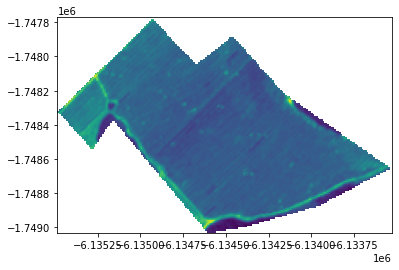

In [ ]:
img_1_rgb = rasterio.open(dataset_1 + df_1['RGB'][0])
show(img_1_rgb)

In [ ]:
img_band_1 = img_1_rgb.read(1)
img_band_2 = img_1_rgb.read(2)
img_band_3 = img_1_rgb.read(3)

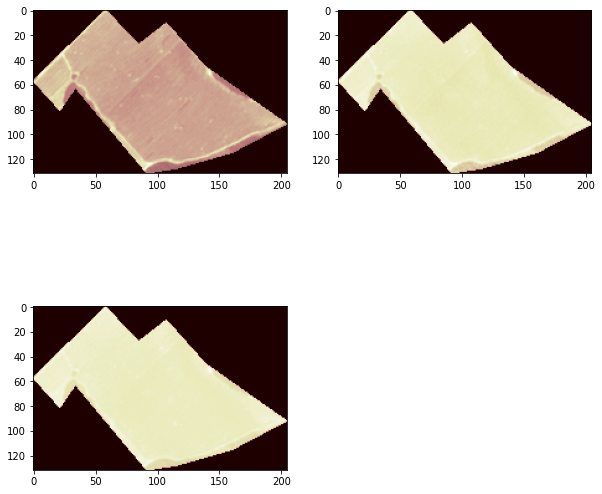

In [ ]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img_band_1, cmap='pink')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(img_band_2, cmap='pink')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(img_band_3, cmap='pink')

In [ ]:
 img_1_rgb.count

3

In [ ]:
# coordenadas 
img_1_rgb.crs

CRS.from_epsg(3857)

In [ ]:
img_1_rgb.descriptions

(None, None, None)

In [ ]:
# encontrar geotransform
img_1_rgb.transform

Affine(9.554628535647032, 0.0, -6135485.60490867,
       0.0, -9.554628535647032, -1747770.8702546984)

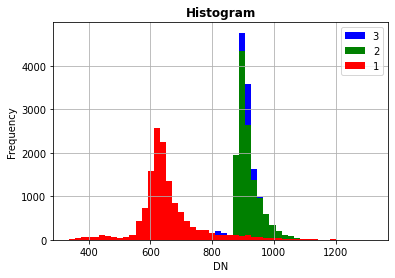

In [ ]:
rasterio.plot.show_hist(img_1_rgb, bins=50, histtype='stepfilled', lw=0.0, stacked=False)

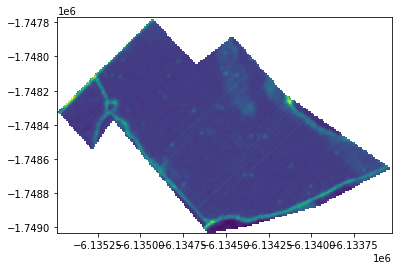

In [ ]:
img_2_rgb = rasterio.open(dataset_1 + df_1['RGB'][1])
show(img_2_rgb)

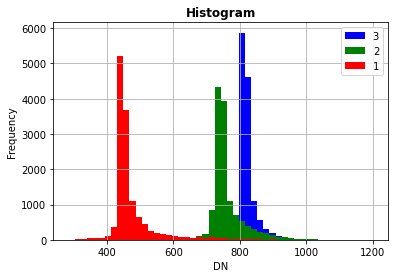

In [ ]:
rasterio.plot.show_hist(img_2_rgb, bins=50, histtype='stepfilled', lw=0.0, stacked=False)

In [ ]:
img_1_rgb.bounds

BoundingBox(left=-6135485.60490867, bottom=-1749032.0812214038, right=-6133526.906058863, top=-1747770.8702546984)